In [158]:
from warnings import filterwarnings
filterwarnings('ignore')

## API Connection

In [2]:
!pip install tweepy

In [2]:
import tweepy, codecs 

In [3]:


consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

## Getting data from twitter

In [4]:
api

In [5]:
mvk = api.get_user(screen_name = "alperen_cvlk")

In [6]:
followers=mvk.followers_count

In [7]:
followers

5

In [8]:
for friend in mvk.friends():
    print(friend.name)

Alper Biçen
SelcukSportsᴴᴰ
Crypto Troia
Bee Network Official
Pi Network
sude
alisya
Mustafa Aktaş
rhiannon


In [9]:
# hometimeline

In [10]:
public_tweets = api.home_timeline(count = 10)

In [1]:
#public_tweets

In [12]:
for tweet in public_tweets:
    print(tweet.text)

Herkese selamlar. Dün 1,97$ civarından %30 kârla sattığım INJ şu an 1,84$'a kadar geri çekilmişken, onun yerine 0,2… https://t.co/5o968rcapj
RT @breaking_frames: Breaking Bad - Season 04 Episode 07 - Frame 2277 of 2833 https://t.co/F6HGHvuj8c
Bugün 19:00'daki videom kaçmaz.. Laf atan izleyiciyle 1v1 mi dersin, IRL basketbol mu dersin, BHS'yle içerik mi dersin hepsi bir videoda.. 💯
Listeye üçüncü sıradan giriş yaptık, birkaç güne liderliği alırız diye düşünüyorum.

Herkese iyi geceler, mutlu haf… https://t.co/1oXei1OFm1
Tweetleri begenmeyen engellesin, uygulamada bildirimi gormek isteyen silsin. Kafa skmeyin.
Olm izin verinde sevinelim uzun suredir boyle degiliz. Jesus dedem iyiki bizimlesin yaa sapsik
Oooooooo ooooooooooo alev alev her yer yaniyor benim kanim sari lacivert akiyor


In [13]:
#user timeline

In [14]:
user = api.get_user(screen_name = "cerenbastas")
user.followers_count

147

In [15]:


for followers in user.followers():
    print(followers.name)

TuğraArda
B
Arda
the nicest person you will ever meet
arslan
dogukan
melike
AREL 1.94
karanliktanaydinliga
ozkan
Emre
kübra
п
Oğuz
Leon Kalkman
Berenike
e.
Akira
mühendisyen
fresh duyguların adamı


In [16]:
#retweets

In [17]:
?api

Type:        API
String form: <tweepy.api.API object at 0x000001F0319F6340>
File:        c:\users\mehme\anaconda3\lib\site-packages\tweepy\api.py
Docstring:  
Twitter API v1.1 Interface

Parameters
----------
auth
    The authentication handler to be used
cache
    The cache to query if a GET method is used
host
    The general REST API host server URL
parser
    The Parser instance to use for parsing the response from Twitter;
    defaults to an instance of ModelParser
proxy
    The full url to an HTTPS proxy to use for connecting to Twitter
retry_count
    Number of retries to attempt when an error occurs
retry_delay
    Number of seconds to wait between retries
retry_errors
    Which HTTP status codes to retry
timeout
    The maximum amount of time to wait for a response from Twitter
upload_host
    The URL of the upload server
wait_on_rate_limit
    Whether or not to automatically wait for rate limits to replenish

Raises
------
TypeError
    If the given parser is not a Parser ins

In [18]:
retweets = api.get_retweets_of_me()

In [19]:
#hashtag

In [20]:
results = api.search_tweets(q = "Casillas", 
                     lang = "tr", 
                     result_type = "recent", 
                     count = 100)

In [2]:
#results


In [22]:
for retweet in results:
    print(retweet.text)

RT @ghitdrogo: casillas: moralim bozuk 

puyol: https://t.co/3KczjelFmV
RT @kaya44_34: #SumeyyeYasasin
Haydi Twitter 

Ankara Garı Pablo Ekrobar Putin #UkraineRussianWar Casillas #sondakika Puyol #Kiev Optimus P…
Puyol Casillas ile olan hikayesini itiraf ediyor https://t.co/Sekmc1ls9O
Casillas’ta olsan o aynada selfie’yi çekecen
Puyolgile taşınıyo heralde https://t.co/AeBldF9vs4
RT @Overlokcu12: Casillas ve puyol sokak röportajı gizli çekim https://t.co/pjsVFKzUZf
RT @kaya44_34: Yoğun bakımda
Destek
#SumeyyeYasasin
Ankara Garı Pablo Ekrobar Putin #UkraineRussianWar Casillas #sondakika Puyol #Kiev Opti…
RT @kaya44_34: #SumeyyeYasasin
Haydi Twitter 

Ankara Garı Pablo Ekrobar Putin #UkraineRussianWar Casillas #sondakika Puyol #Kiev Optimus P…
RT @sevgisozler1: Bu tatlılık, ballık Allah'ın özel yaratması😍
Allah herkese huzurlu, sevgi dolu akşamlar versin🙏
.
Murat Soner Casillas Fe…
RT @Gustavodia_: Soyunma odasında Puyol ile Casillas’ı birlikte gören Iniesta https://t.co/lJbZqQ2sPf
Bu tat

In [23]:
## convert to dataframe 

In [24]:
import pandas as pd
def tweets_to_df(results):
    id_list = [tweet.id for tweet in results]
    data_set = pd.DataFrame(id_list, columns = ["id"])
    
    data_set["text"] = [tweet.text for tweet in results]
    data_set["created_at"] = [tweet.created_at for tweet in results]
    data_set["retweet_count"] = [tweet.retweet_count for tweet in results]
    data_set["user_screen_name"] = [tweet.user.screen_name for tweet in results]
    data_set["user_followers_count"] = [tweet.user.followers_count for tweet in results]
    data_set["hashtags"] = [tweet.entities.get('hashtags') for tweet in results]
    data_set["user_location"] = [tweet.author.location for tweet in results]
    
    return data_set

In [25]:
converted_data = tweets_to_df(results)

In [26]:
converted_data.head()

,id,text,created_at,retweet_count,user_screen_name,user_followers_count,hashtags,user_location
0,1579497600369430529,RT @ghitdrogo: casillas: moralim bozuk \n\npuy...,2022-10-10 15:42:28+00:00,123,Mrfahrenhayt7,143,[],Muz Cumhuriyeti
1,1579497135414083585,RT @kaya44_34: #SumeyyeYasasin\nHaydi Twitter ...,2022-10-10 15:40:37+00:00,37,araf3472,8,"[{'text': 'SumeyyeYasasin', 'indices': [15, 30...",
2,1579496962625536000,Puyol Casillas ile olan hikayesini itiraf ediy...,2022-10-10 15:39:56+00:00,0,GLavli,162,[],"Trabzon, Türkiye"
3,1579496917989756929,Casillas’ta olsan o aynada selfie’yi çekecen\n...,2022-10-10 15:39:45+00:00,0,ErcanTusu,58,[],"Bucharest, Romania"
4,1579496564309233664,RT @Overlokcu12: Casillas ve puyol sokak röpor...,2022-10-10 15:38:21+00:00,64,ugur297kd,335,[],"İstanbul, Türkiye"


In [46]:
#converted_data.to_csv("twitter_data.csv")

# Profile analysis

In [27]:
mac = api.get_user(screen_name = "cerenbastas")

In [28]:
mac.name

'rhiannon'

In [29]:
mac.id

808716009230237696

In [30]:
mac.url

'https://t.co/DoAgt0UWjw'

In [31]:
mac.followers_count

147

In [32]:
mac.favourites_count

28343

In [33]:
mac.friends_count

236

In [34]:
tweets = api.user_timeline(screen_name = "cerenbastas")

In [35]:
for tweet in tweets:
    print(tweet.text)

RT @breaking_frames: Breaking Bad - Season 04 Episode 07 - Frame 2277 of 2833 https://t.co/F6HGHvuj8c
RT @scrpiomood: men are soo
#HouseOfTheDragon https://t.co/YrQgBDakYs
@zeynepzagra Bunu bizim önümüze düşürmene gerek var mıydı peki
@zeynepzagra ((Üni)1.sınıf)
@zeynepzagra Beni dövme amacıyla marmaris büfede kaldırdığın için cezalandırıldıb
Anlık erkan başla aynı yemek sırasındayım
RT @cinepacino: i watched 4 movies in august https://t.co/QQW9Qz62wr
Liyakat https://t.co/ftTa4ZEADo
RT @mubi: OSLO, AUGUST 31ST (Joachim Trier, 2011.) https://t.co/nu1Cyl3TZT
RT @monkeyslyrics: i wanna be your vacuum cleaner
breathing in your dust
Kadına karşı şiddetin en ağır şekline maruz kaldım💀💀💀 https://t.co/frdoADcRMR
RT @SigmaMemes_69: https://t.co/SpwHeztpJU
RT @bogazicitv: 🔴 SON DAKİKA

Kayyum Naci İnci tarafından 16 Boğaziçi akademisyeninin ders vermesi engellendi. Tam ve yarı zamanlı olarak u…
Two best friends in a room they might kiss https://t.co/MAa9oQZJ8J
Olur https://t.co/CMv8O5z1S8
RT @Bo

In [39]:
def timeline_df_converter(tweets):
    import pandas as pd
    
    ids = [tweet.id for tweet in tweets]
    df = pd.DataFrame(ids, columns = ["id"])
    
    df["text"] = [tweet.text for tweet in tweets]
    df["created_at"] = [tweet.created_at for tweet in tweets]
    df["retweet_count"] = [tweet.retweet_count for tweet in tweets]
    df["source"] = [tweet.source for kisi in tweets]
    df["favorite_count"] = [tweet.favorite_count for tweet in tweets]
    
    return df

In [40]:
converted_tweet_df = timeline_df_converter(tweets)
converted_tweet_df.head()

,id,text,created_at,retweet_count,source,favorite_count
0,1579434915921563649,RT @breaking_frames: Breaking Bad - Season 04 ...,2022-10-10 11:33:23+00:00,743,Twitter for iPhone,0
1,1574503854518984739,RT @scrpiomood: men are soo\n#HouseOfTheDragon...,2022-09-26 20:59:06+00:00,9434,Twitter for iPhone,0
2,1574469248512135188,@zeynepzagra Bunu bizim önümüze düşürmene gere...,2022-09-26 18:41:35+00:00,0,Twitter for iPhone,1
3,1571558066432221185,@zeynepzagra ((Üni)1.sınıf),2022-09-18 17:53:35+00:00,0,Twitter for iPhone,1
4,1571556638456176640,@zeynepzagra Beni dövme amacıyla marmaris büfe...,2022-09-18 17:47:55+00:00,0,Twitter for iPhone,1


## Retweet and favorite counts 

In [38]:
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
import matplotlib.pyplot as plt

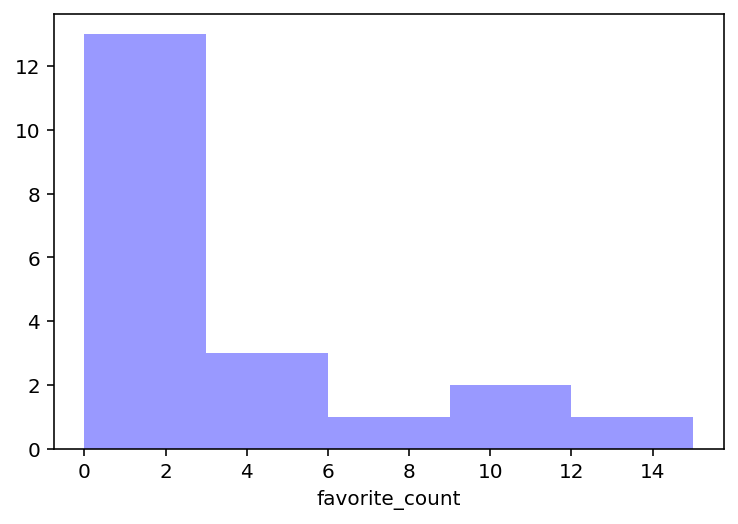

In [41]:
sns.distplot(converted_tweet_df.favorite_count, kde = False, color = "blue");

(-100.0, 5000.0)

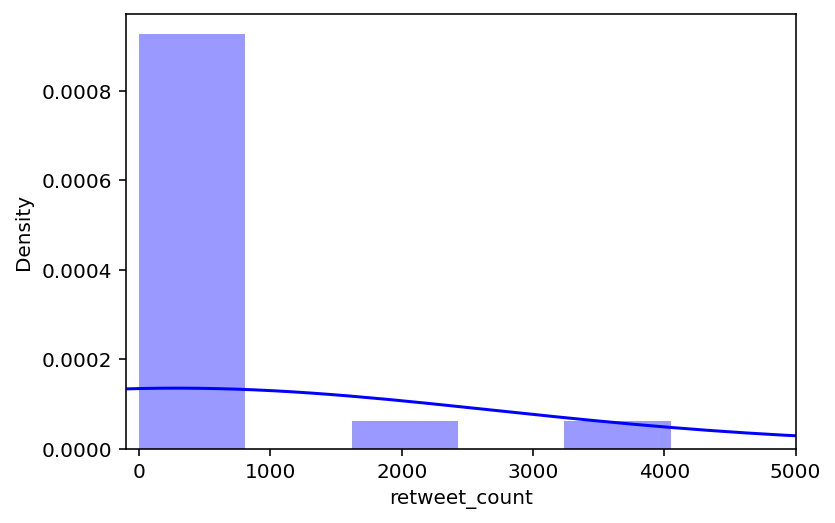

In [42]:
sns.distplot(converted_tweet_df.retweet_count, color = "blue");
plt.xlim(-100, 5000)

## Tweet - Hours Distribution

In [43]:
converted_tweet_df.head()

,id,text,created_at,retweet_count,source,favorite_count
0,1579434915921563649,RT @breaking_frames: Breaking Bad - Season 04 ...,2022-10-10 11:33:23+00:00,743,Twitter for iPhone,0
1,1574503854518984739,RT @scrpiomood: men are soo\n#HouseOfTheDragon...,2022-09-26 20:59:06+00:00,9434,Twitter for iPhone,0
2,1574469248512135188,@zeynepzagra Bunu bizim önümüze düşürmene gere...,2022-09-26 18:41:35+00:00,0,Twitter for iPhone,1
3,1571558066432221185,@zeynepzagra ((Üni)1.sınıf),2022-09-18 17:53:35+00:00,0,Twitter for iPhone,1
4,1571556638456176640,@zeynepzagra Beni dövme amacıyla marmaris büfe...,2022-09-18 17:47:55+00:00,0,Twitter for iPhone,1


In [44]:
converted_tweet_df["tweet_time"] = converted_tweet_df["created_at"].apply(lambda x: x.strftime("%H"))

In [45]:
converted_tweet_df.head()

,id,text,created_at,retweet_count,source,favorite_count,tweet_time
0,1579434915921563649,RT @breaking_frames: Breaking Bad - Season 04 ...,2022-10-10 11:33:23+00:00,743,Twitter for iPhone,0,11
1,1574503854518984739,RT @scrpiomood: men are soo\n#HouseOfTheDragon...,2022-09-26 20:59:06+00:00,9434,Twitter for iPhone,0,20
2,1574469248512135188,@zeynepzagra Bunu bizim önümüze düşürmene gere...,2022-09-26 18:41:35+00:00,0,Twitter for iPhone,1,18
3,1571558066432221185,@zeynepzagra ((Üni)1.sınıf),2022-09-18 17:53:35+00:00,0,Twitter for iPhone,1,17
4,1571556638456176640,@zeynepzagra Beni dövme amacıyla marmaris büfe...,2022-09-18 17:47:55+00:00,0,Twitter for iPhone,1,17


In [46]:
converted_tweet_df["tweet_time"] = pd.to_numeric(converted_tweet_df["tweet_time"])
converted_tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              20 non-null     int64              
 1   text            20 non-null     object             
 2   created_at      20 non-null     datetime64[ns, UTC]
 3   retweet_count   20 non-null     int64              
 4   source          20 non-null     object             
 5   favorite_count  20 non-null     int64              
 6   tweet_time      20 non-null     int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(2)
memory usage: 1.2+ KB


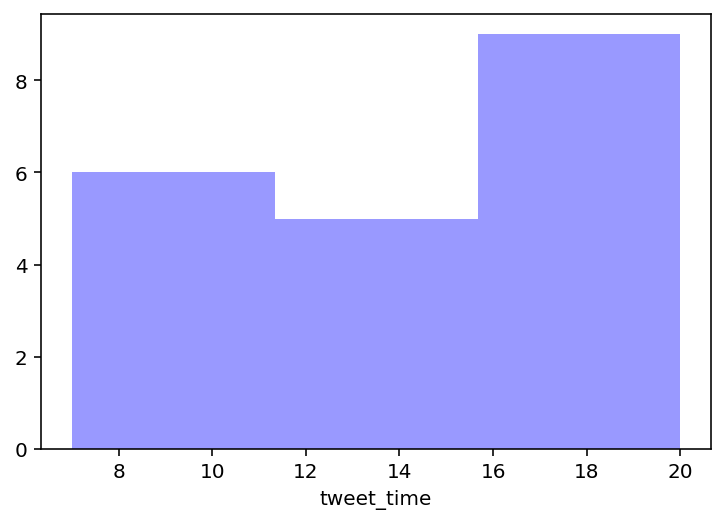

In [48]:
sns.distplot(converted_tweet_df["tweet_time"], kde = False, color ="blue");

## Twitter source determination

In [83]:
source_freq = converted_tweet_df.groupby("source").count()["id"]

<AxesSubplot: xlabel='source'>

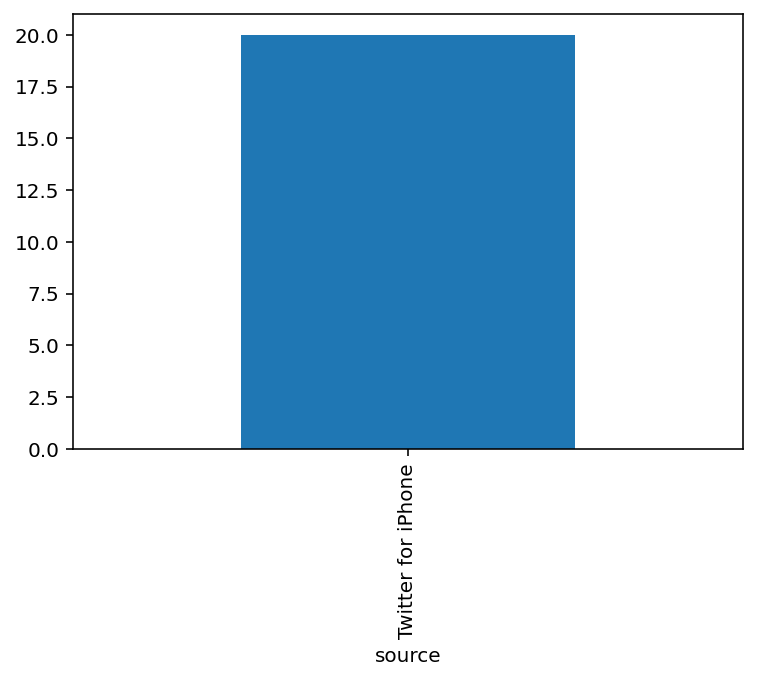

In [85]:
source_freq.plot.bar(x = "source", y = "id")

In [86]:
converted_tweet_df.groupby("source").count()["id"]

source
Twitter for iPhone    20
Name: id, dtype: int64

## Followers and friends analysis

In [87]:
user = api.get_user(screen_name = "cerenbastas")

In [92]:
print("Friends:\n" )
for friend in user.friends():
    print(friend.screen_name)
    
print("Friends count:" ,user.friends_count)

Friends:

orumcekdiyari
melikezorluer
posttenebrasIux
pudizm
larsiaessa
oguzcnalb
noklayev
altyazaresek
dionysoscinema
hewruewr
bartu_k
gunaydincimcime
apostonews
binlerceobi
yvonemunster
BotNormalPeople
rickygervais
mubi
temizkapakkk
MehmetBaranKl
Friends count: 236


In [93]:
friends = user.friends()
followers = user.followers()

In [97]:
def followers_df(followers):
    df = pd.DataFrame([follower.id for follower in followers], columns = ["id"])
    
    df["created_at"] = [follower.created_at for follower in followers]
    df["screen_name"] = [follower.screen_name for follower in followers]
    df["location"] = [follower.location for follower in followers]
    df["followers_count"] = [follower.followers_count for follower in followers]
    df["statuses_count"] = [follower.statuses_count for follower in followers]
    df["friends_count"] = [follower.friends_count for follower in followers]
    df["favourites_count"] = [follower.favourites_count for follower in followers]
    
    return df

In [98]:
df = followers_df(followers)
df.head()

,id,created_at,screen_name,location,followers_count,statuses_count,friends_count,favourites_count
0,1190647673323425793,2019-11-02 15:11:52+00:00,TugraArda1907,"İzmir, Türkiye",3911,1879,4283,30089
1,883707357661974528,2017-07-08 15:20:27+00:00,hickimseniizz,"İstanbul, Türkiye",1242,797,442,15008
2,1251577715204882433,2020-04-18 18:26:35+00:00,ardakarabaglar,,120,39,187,51
3,1288065579966963713,2020-07-28 10:55:46+00:00,orumcekdiyari,,36,3732,158,8192
4,1312098781329068033,2020-10-02 18:35:16+00:00,tipciarslanbey,"İstanbul, Türkiye",1403,1254,1486,6888


## Followers segmentation


In [99]:
df.index = df["screen_name"]

In [100]:
df.head()

,id,created_at,screen_name,location,followers_count,statuses_count,friends_count,favourites_count
screen_name,,,,,,,,
TugraArda1907,1190647673323425793,2019-11-02 15:11:52+00:00,TugraArda1907,"İzmir, Türkiye",3911,1879,4283,30089
hickimseniizz,883707357661974528,2017-07-08 15:20:27+00:00,hickimseniizz,"İstanbul, Türkiye",1242,797,442,15008
ardakarabaglar,1251577715204882433,2020-04-18 18:26:35+00:00,ardakarabaglar,,120,39,187,51
orumcekdiyari,1288065579966963713,2020-07-28 10:55:46+00:00,orumcekdiyari,,36,3732,158,8192
tipciarslanbey,1312098781329068033,2020-10-02 18:35:16+00:00,tipciarslanbey,"İstanbul, Türkiye",1403,1254,1486,6888


In [101]:
s_data = df[["followers_count", "statuses_count"]]

In [102]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, TugraArda1907 to sakadusunuyorum
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   followers_count  20 non-null     int64
 1   statuses_count   20 non-null     int64
dtypes: int64(2)
memory usage: 480.0+ bytes


In [103]:
s_data

,followers_count,statuses_count
screen_name,,
TugraArda1907,3911,1879
hickimseniizz,1242,797
ardakarabaglar,120,39
orumcekdiyari,36,3732
tipciarslanbey,1403,1254
dogukngr,636,677
melikezorluer,85,231
acumzz,1860,3657
posttenebrasIux,91,96


In [104]:
s_data["followers_count"] = s_data["followers_count"] + 0.01
s_data["statuses_count"] = s_data["statuses_count"] + 0.01

In [105]:
s_data

,followers_count,statuses_count
screen_name,,
TugraArda1907,3911.01,1879.01
hickimseniizz,1242.01,797.01
ardakarabaglar,120.01,39.01
orumcekdiyari,36.01,3732.01
tipciarslanbey,1403.01,1254.01
dogukngr,636.01,677.01
melikezorluer,85.01,231.01
acumzz,1860.01,3657.01
posttenebrasIux,91.01,96.01


In [106]:
6.01 * 1.01 

6.0701

In [107]:
4.01 * 39.01

156.43009999999998

In [108]:
3 * 0.01

0.03

In [109]:
s_data = s_data.apply(lambda x: (x-min(x))/(max(x)-min(x)))

In [110]:
s_data["followers_count"] = s_data["followers_count"] + 0.01
s_data["statuses_count"] = s_data["statuses_count"] + 0.01

In [111]:
s_data.head()

,followers_count,statuses_count
screen_name,,
TugraArda1907,0.030335,0.022635
hickimseniizz,0.016329,0.015359
ardakarabaglar,0.010441,0.010262
orumcekdiyari,0.010000,0.035096
tipciarslanbey,0.017174,0.018433


In [112]:
skor = s_data["followers_count"] * s_data["statuses_count"]
skor

screen_name
TugraArda1907      0.000687
hickimseniizz      0.000251
ardakarabaglar     0.000107
orumcekdiyari      0.000351
tipciarslanbey     0.000317
dogukngr           0.000191
melikezorluer      0.000119
acumzz             0.000677
posttenebrasIux    0.000110
nm_ozkan           0.000106
pudizm             0.000225
larsiaessa         0.000406
ooswaldd           0.001302
oguzcnalb          0.000136
leonkalkm          0.000137
sinnerveronika1    0.000149
chrryevil          0.000252
binlerceobi        0.000258
muhendisyenn       1.020100
sakadusunuyorum    0.000727
dtype: float64

In [113]:
skor.sort_values(ascending = False)

screen_name
muhendisyenn       1.020100
ooswaldd           0.001302
sakadusunuyorum    0.000727
TugraArda1907      0.000687
acumzz             0.000677
larsiaessa         0.000406
orumcekdiyari      0.000351
tipciarslanbey     0.000317
binlerceobi        0.000258
chrryevil          0.000252
hickimseniizz      0.000251
pudizm             0.000225
dogukngr           0.000191
sinnerveronika1    0.000149
leonkalkm          0.000137
oguzcnalb          0.000136
melikezorluer      0.000119
posttenebrasIux    0.000110
ardakarabaglar     0.000107
nm_ozkan           0.000106
dtype: float64

In [114]:
skor[skor > skor.median() + skor.std()/len(skor)].sort_values(ascending = False)

screen_name
muhendisyenn    1.0201
dtype: float64

In [115]:
skor.std()

0.2280249298118388

In [116]:
skor.median()

0.00025140334730599536

In [117]:
s_data["skor"] = skor

In [118]:
s_data

,followers_count,statuses_count,skor
screen_name,,,
TugraArda1907,0.030335,0.022635,0.000687
hickimseniizz,0.016329,0.015359,0.000251
ardakarabaglar,0.010441,0.010262,0.000107
orumcekdiyari,0.010000,0.035096,0.000351
tipciarslanbey,0.017174,0.018433,0.000317
dogukngr,0.013149,0.014552,0.000191
melikezorluer,0.010257,0.011553,0.000119
acumzz,0.019572,0.034591,0.000677
posttenebrasIux,0.010289,0.010646,0.000110


In [119]:
import numpy as np
s_data["segment"] = np.where(s_data["skor"] >= skor.median() + 
                             skor.std()/len(skor), "A","B")

In [120]:
s_data

,followers_count,statuses_count,skor,segment
screen_name,,,,
TugraArda1907,0.030335,0.022635,0.000687,B
hickimseniizz,0.016329,0.015359,0.000251,B
ardakarabaglar,0.010441,0.010262,0.000107,B
orumcekdiyari,0.010000,0.035096,0.000351,B
tipciarslanbey,0.017174,0.018433,0.000317,B
dogukngr,0.013149,0.014552,0.000191,B
melikezorluer,0.010257,0.011553,0.000119,B
acumzz,0.019572,0.034591,0.000677,B
posttenebrasIux,0.010289,0.010646,0.000110,B


## Hashtag analysis

In [4]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [6]:
api.available_trends()

[{'name': 'Worldwide',
  'placeType': {'code': 19, 'name': 'Supername'},
  'url': 'http://where.yahooapis.com/v1/place/1',
  'parentid': 0,
  'country': '',
  'woeid': 1,
  'countryCode': None},
 {'name': 'Winnipeg',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/2972',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 2972,
  'countryCode': 'CA'},
 {'name': 'Ottawa',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3369',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 3369,
  'countryCode': 'CA'},
 {'name': 'Quebec',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3444',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 3444,
  'countryCode': 'CA'},
 {'name': 'Montreal',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3534',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 3534,
  'co

In [9]:
def ulke_kodlari():
    places = api.available_trends()
    all_woeids = {place['name'].lower(): place['woeid'] for place in places}
    return all_woeids

In [10]:
ulke_kodlari()

{'worldwide': 1,
 'winnipeg': 2972,
 'ottawa': 3369,
 'quebec': 3444,
 'montreal': 3534,
 'toronto': 4118,
 'edmonton': 8676,
 'calgary': 8775,
 'vancouver': 9807,
 'birmingham': 2364559,
 'blackpool': 12903,
 'bournemouth': 13383,
 'brighton': 13911,
 'bristol': 13963,
 'cardiff': 15127,
 'coventry': 17044,
 'derby': 18114,
 'edinburgh': 19344,
 'glasgow': 21125,
 'hull': 25211,
 'leeds': 26042,
 'leicester': 26062,
 'liverpool': 26734,
 'manchester': 28218,
 'middlesbrough': 28869,
 'newcastle': 30079,
 'nottingham': 30720,
 'plymouth': 32185,
 'portsmouth': 32452,
 'preston': 32566,
 'sheffield': 34503,
 'stoke-on-trent': 36240,
 'swansea': 36758,
 'london': 44418,
 'belfast': 44544,
 'santo domingo': 76456,
 'guatemala city': 83123,
 'acapulco': 110978,
 'aguascalientes': 111579,
 'chihuahua': 115958,
 'mexico city': 116545,
 'ciudad juarez': 116556,
 'nezahualcóyotl': 116564,
 'culiacán': 117994,
 'ecatepec de morelos': 118466,
 'guadalajara': 124162,
 'hermosillo': 124785,
 'león

In [11]:
def ulke_woeid(ulke_adi):
    ulke_adi = ulke_adi.lower()
    trends = api.available_trends()
    all_woeids = ulke_kodlari()
    return all_woeids[ulke_adi]
    

In [12]:
ulke_woeid("turkey")

23424969

In [15]:
trendler = api.get_place_trends(id = 23424969)
trendler

[{'trends': [{'name': '#MemurVergiDilimi',
    'url': 'http://twitter.com/search?q=%23MemurVergiDilimi',
    'promoted_content': None,
    'query': '%23MemurVergiDilimi',
    'tweet_volume': 17647},
   {'name': 'İlk Evim İlk İşyerim',
    'url': 'http://twitter.com/search?q=%22%C4%B0lk+Evim+%C4%B0lk+%C4%B0%C5%9Fyerim%22',
    'promoted_content': None,
    'query': '%22%C4%B0lk+Evim+%C4%B0lk+%C4%B0%C5%9Fyerim%22',
    'tweet_volume': None},
   {'name': '#TSvKSP',
    'url': 'http://twitter.com/search?q=%23TSvKSP',
    'promoted_content': None,
    'query': '%23TSvKSP',
    'tweet_volume': None},
   {'name': 'devletburada esenyurt',
    'url': 'http://twitter.com/search?q=%22devletburada+esenyurt%22',
    'promoted_content': None,
    'query': '%22devletburada+esenyurt%22',
    'tweet_volume': None},
   {'name': 'Müjdeler',
    'url': 'http://twitter.com/search?q=M%C3%BCjdeler',
    'promoted_content': None,
    'query': 'M%C3%BCjdeler',
    'tweet_volume': None},
   {'name': '#AdaletHem

In [16]:
import json
print(json.dumps(trendler, indent = 4))

[
    {
        "trends": [
            {
                "name": "#MemurVergiDilimi",
                "url": "http://twitter.com/search?q=%23MemurVergiDilimi",
                "promoted_content": null,
                "query": "%23MemurVergiDilimi",
                "tweet_volume": 17647
            },
            {
                "name": "\u0130lk Evim \u0130lk \u0130\u015fyerim",
                "url": "http://twitter.com/search?q=%22%C4%B0lk+Evim+%C4%B0lk+%C4%B0%C5%9Fyerim%22",
                "promoted_content": null,
                "query": "%22%C4%B0lk+Evim+%C4%B0lk+%C4%B0%C5%9Fyerim%22",
                "tweet_volume": null
            },
            {
                "name": "#TSvKSP",
                "url": "http://twitter.com/search?q=%23TSvKSP",
                "promoted_content": null,
                "query": "%23TSvKSP",
                "tweet_volume": null
            },
            {
                "name": "devletburada esenyurt",
                "url": "http://twitt

In [18]:
turkiye = api.get_place_trends(id = 23424969)
trendler = turkiye[0]["trends"]

In [19]:
for i in trendler:
    print(i["name"])

#MemurVergiDilimi
İlk Evim İlk İşyerim
#TSvKSP
devletburada esenyurt
Müjdeler
#AdaletHemenŞimdi
#SendikalarBirlikteEyleme
Abdullah Avcı
#yasakelma
FahriÖğreticilereEkimdeKadro
kamueczacısı müjdebekliyor
DenklikHakkı TorbadaOlsun
Hamsik
Lahtimi
Yusuf
Trezeguet
Şamil
Kasımpaşa
Kabine Toplantısı
Gbamin
Naci
Nwakaeme
İsraille Görüşmeler
DİN TÜCCARI CHP
EEMAtama İstiyor
Trabzonspor
Dia Saba
Cumhurbaşkanlığı Kabinesi
Araç
Ruhumunİkizi EkKan
Maxi Gomez
Aycan Sarıahmet
Pudra
Bozkurt
Hüseyin Göçek
HerDaimSeninle YektaTorun
Umut Bozok
Başakşehir
TozluYaka SenaristDeğişikliği
İİBFyeMerkeziden 20binAtama
Albayrak
Esenler Belediye Başkanımız
Halkbank
Penaltı
mehmet baransu
Ford
Merhumeye Allah'tan
Ekrem İmamoğlu
Ertuğrul
Larsen


## Getting data from hashtag

In [3]:
tweetler = api.search_tweets(q = "#pazartesi", 
                      lang = "tr", 
                      result_type = "recent", 
                     count = 1000)

In [4]:
def hashtag_df(tweetler):
    import pandas as pd
    id_list = [tweet.id for tweet  in tweetler]
    df = pd.DataFrame(id_list, columns = ["id"])
    
    df["text"] = [tweet.text for tweet in tweetler]
    df["created_at"] = [tweet.created_at for tweet in tweetler]
    df["retweeted"] = [tweet.retweeted for tweet in tweetler]
    df["retweet_count"] = [tweet.retweet_count for tweet in tweetler]
    df["user_screen_name"] = [tweet.author.screen_name for tweet in tweetler]
    df["user_followers_count"] = [tweet.author.followers_count for tweet in tweetler]
    df["user_location"] = [tweet.author.location for tweet in tweetler]
    df["Hashtags"] = [tweet.entities.get('hashtags') for tweet in tweetler]
    
    return df

In [5]:
df = hashtag_df(tweetler)

In [6]:
df.shape

(100, 9)

In [7]:
df.head()

,id,text,created_at,retweeted,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags
0,1579724789241241600,RT @HastaTutuklular: DUYMAYAN KALMASIN!\n\nHal...,2022-10-11 06:45:14+00:00,False,245,poldem007,622,"Samsun, Türkiye",[]
1,1579724747403059204,"RT @KAANEFEYENEFES: Oğlumu sevmeye,dokunmaya k...",2022-10-11 06:45:04+00:00,False,165,CoolHawk6,297,,[]
2,1579724716759453696,RT @sma_yusufpolat: Bir çocuğun ailesiyle kahv...,2022-10-11 06:44:56+00:00,False,114,unutkan,92,Evim,[]
3,1579724684618522625,RT @sma_fikretasim: Bu cihazlar canımı çok acı...,2022-10-11 06:44:49+00:00,False,143,CoolHawk6,297,,[]
4,1579724670781493248,RT @Muzaffereumutol: Yarın 22:00'da Abdullah b...,2022-10-11 06:44:46+00:00,False,114,acentipede_,56,,[]


## Describing hashtags

In [8]:
#uniqe participant

In [9]:
df["user_screen_name"].unique().size

73

In [10]:
df.groupby("user_screen_name")["id"].count().sum()

100

In [11]:
#top contributors

In [12]:
df.groupby("user_screen_name").count()["id"].sort_values(ascending = False)[0:5]

user_screen_name
unutkan            10
liderbursacom       5
MirzaBee8           3
MahmutBozkurt31     3
ZeynepZ95537035     3
Name: id, dtype: int64

In [13]:
#ozgun katkı

In [14]:
df["text"].str.startswith("RT").head(10)

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: text, dtype: bool

In [15]:
df[~df["text"].str.startswith("RT")].count()["id"] / len(df)

0.08

In [16]:
df[~df["text"].str.startswith("RT")].count()["id"] / df[df["text"].str.startswith("RT")].count()["id"]

0.08695652173913043

In [17]:
## en cok fav-retweet

In [18]:
df.sort_values("retweet_count", ascending = False).head()

,id,text,created_at,retweeted,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags
62,1579719545358782465,RT @twit_Meclisi: Almanya'dan aldıkları işsizl...,2022-10-11 06:24:24+00:00,False,397,MelisSenyasar,244,,[]
85,1579716899856056320,RT @1euro1insann: YUSUF 5 YAŞINDA..\nYAŞAMAK i...,2022-10-11 06:13:53+00:00,False,360,tcmrslctl,495,Türkiye,[]
50,1579720623580119040,RT @ebraranefesol: Zamanla yarışarak çare aram...,2022-10-11 06:28:41+00:00,False,265,ermtoprak,87,,[]
93,1579716225332310016,RT @ebraranefesol: Zamanla yarışarak çare aram...,2022-10-11 06:11:12+00:00,False,265,Gogo47043476,148,,[]
91,1579716581973970945,RT @ebraranefesol: Zamanla yarışarak çare aram...,2022-10-11 06:12:37+00:00,False,265,MahmutBozkurt31,21,,[]


## Tweets hours distribution

In [19]:
tweetler = api.search_tweets(q = "#datascience", lang = "en", count = 5000)

In [20]:
def hashtag_df(tweetler):
    import pandas as pd
    id_list = [tweet.id for tweet  in tweetler]
    df = pd.DataFrame(id_list, columns = ["id"])
    
    df["text"] = [tweet.text for tweet in tweetler]
    df["created_at"] = [tweet.created_at for tweet in tweetler]
    df["retweeted"] = [tweet.retweeted for tweet in tweetler]
    df["retweet_count"] = [tweet.retweet_count for tweet in tweetler]
    df["source"] = [tweet.source for tweet in tweetler]
    df["user_screen_name"] = [tweet.author.screen_name for tweet in tweetler]
    df["user_followers_count"] = [tweet.author.followers_count for tweet in tweetler]
    df["user_location"] = [tweet.author.location for tweet in tweetler]
    df["Hashtags"] = [tweet.entities.get('hashtags') for tweet in tweetler]
    
    return df

In [21]:
df = hashtag_df(tweetler)

In [22]:
df.shape

(86, 10)

In [23]:
df.head()

,id,text,created_at,retweeted,retweet_count,source,user_screen_name,user_followers_count,user_location,Hashtags
0,1579724795272343552,RT @Programmatoris: Protecting my encryption a...,2022-10-11 06:45:15+00:00,False,1,AI Data Governance Framework,gdprAI,7820,"England, United Kingdom",[]
1,1579724766482616320,"If we have data, let\’s look at data. If all w...",2022-10-11 06:45:08+00:00,False,0,QOTD_17,qotd_17,26,"Berkley, Port 17","[{'text': 'DataScience', 'indices': [87, 99]},..."
2,1579724717027897345,RT @Strategy_Gal: Wanna learn #Python for #Dat...,2022-10-11 06:44:57+00:00,False,4,Twitter for iPhone,ujwaltickoo,1300,Bangalore,"[{'text': 'Python', 'indices': [30, 37]}, {'te..."
3,1579724616125526017,RT @QUTDataScience: What is Data Science? Why ...,2022-10-11 06:44:33+00:00,False,7,Twitter for Android,dembeno,43,"Hollandia, West Papua",[]
4,1579724576304816128,RT @YuHelenYu: 10 Popular Machine Learning Alg...,2022-10-11 06:44:23+00:00,False,6,RetweetCodersWomen,BotFemale,3675,,"[{'text': 'AI', 'indices': [94, 97]}, {'text':..."


In [24]:
df["tweet_time"] = df["created_at"].apply(lambda x: x.strftime("%H"))

In [25]:
df.head()

,id,text,created_at,retweeted,retweet_count,source,user_screen_name,user_followers_count,user_location,Hashtags,tweet_time
0,1579724795272343552,RT @Programmatoris: Protecting my encryption a...,2022-10-11 06:45:15+00:00,False,1,AI Data Governance Framework,gdprAI,7820,"England, United Kingdom",[],06
1,1579724766482616320,"If we have data, let\’s look at data. If all w...",2022-10-11 06:45:08+00:00,False,0,QOTD_17,qotd_17,26,"Berkley, Port 17","[{'text': 'DataScience', 'indices': [87, 99]},...",06
2,1579724717027897345,RT @Strategy_Gal: Wanna learn #Python for #Dat...,2022-10-11 06:44:57+00:00,False,4,Twitter for iPhone,ujwaltickoo,1300,Bangalore,"[{'text': 'Python', 'indices': [30, 37]}, {'te...",06
3,1579724616125526017,RT @QUTDataScience: What is Data Science? Why ...,2022-10-11 06:44:33+00:00,False,7,Twitter for Android,dembeno,43,"Hollandia, West Papua",[],06
4,1579724576304816128,RT @YuHelenYu: 10 Popular Machine Learning Alg...,2022-10-11 06:44:23+00:00,False,6,RetweetCodersWomen,BotFemale,3675,,"[{'text': 'AI', 'indices': [94, 97]}, {'text':...",06


In [26]:
import pandas as pd
df["tweet_time"] = pd.to_numeric(df["tweet_time"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   id                    86 non-null     int64              
 1   text                  86 non-null     object             
 2   created_at            86 non-null     datetime64[ns, UTC]
 3   retweeted             86 non-null     bool               
 4   retweet_count         86 non-null     int64              
 5   source                86 non-null     object             
 6   user_screen_name      86 non-null     object             
 7   user_followers_count  86 non-null     int64              
 8   user_location         86 non-null     object             
 9   Hashtags              86 non-null     object             
 10  tweet_time            86 non-null     int64              
dtypes: bool(1), datetime64[ns, UTC](1), int64(4), object(5)
memory usage: 6.9

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Mehme\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


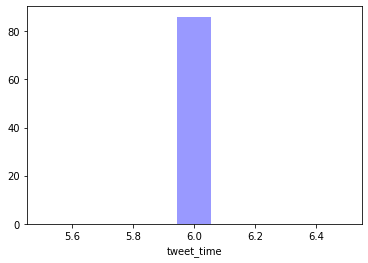

In [28]:
sns.distplot(df["tweet_time"], kde = False, color ="blue");

## tweet source determination

In [29]:
source_freq = df.groupby("source").count()["id"]

<AxesSubplot: xlabel='source'>

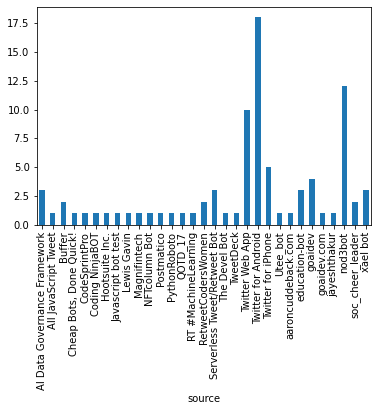

In [30]:
source_freq.plot.bar(x = "source", y = "id")

In [31]:
df.groupby("source").count()["id"]

source
AI Data Governance Framework     3
All JavaScript Tweet             1
Buffer                           2
Cheap Bots, Done Quick!          1
CodeSprintPro                    1
Coding NinjaBOT                  1
Hootsuite Inc.                   1
Javascript bot test              1
Lewis Gavin                      1
Magnifintech                     1
NFTcolumn Bot                    1
Postmatico                       1
PythonRoboto                     1
QOTD_17                          1
RT #MachineLearning              1
RetweetCodersWomen               2
Serverless Tweet/Retweet Bot     3
The Devel Bot                    1
TweetDeck                        1
Twitter Web App                 10
Twitter for Android             18
Twitter for iPhone               5
Utee_bot                         1
aaroncuddeback.com               1
education-bot                    3
goaidev                          4
goaidev.com                      1
jayeshthakur                     1
nod3bot      

## Twitter text mining

In [1]:
import tweepy, codecs 

In [2]:
consumer_key = 'mKIsMybj4Fs4accK37r7yVbTP'
consumer_secret = 'jDpuxB37Ktv0CteHmeQJRKRqBICpBPGv0YhDkYg4N4HnuakIHu'
access_token = '1312817053359919106-dBWupdcVXTJRxY5RocLUw69VOjUfdG'
access_token_secret = 'famlTWRy0DpVd48m658tuwfeZaredyzUy0X1sYLhwi4bQ'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [32]:
df = hashtag_df(tweetler)

#buyuk-kucuk donusumu
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#noktalama işaretleri
df['text'] = df['text'].str.replace('[^\w\s]','')

#sayılar
df['text'] = df['text'].str.replace('\d','')

#stopwords
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

#lemmi
from textblob import Word
#nltk.download('wordnet')
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

#noktalama işaretleri
df['text'] = df['text'].str.replace('rt','')

C:\Users\Mehme\AppData\Local\Temp\ipykernel_21104\238211879.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]','')
C:\Users\Mehme\AppData\Local\Temp\ipykernel_21104\238211879.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('\d','')


In [33]:
df["text"]

0      programmatoris protecting encryption algorith...
1     data let look data opinion let go mine datasci...
2      strategy_gal wanna learn python datascience y...
3      qutdatascience data science impoant check lat...
4      yuhelenyu popular machine learning algorithm ...
                            ...                        
81     ratingology 𝐒𝐭𝐚𝐭𝐬 𝐨𝐟 𝐥𝐢𝐯𝐞 𝐯𝐢𝐞𝐰𝐞𝐫𝐬 𝐨𝐧 youtube ...
82     bdanalyticsnews confused machine learning yes...
83     sachinp data science comprises combination ma...
84     thefarooqii sql command type machinelearning ...
85     theraosambhaji chewy hiring staff machine lea...
Name: text, Length: 86, dtype: object

In [42]:
freq_df = df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()

In [43]:
freq_df.columns = ["words","frequencies"]

In [44]:
freq_df.shape

(349, 2)

In [45]:
freq_df.head()

,words,frequencies
0,,76.0
1,programmatoris,1.0
2,protecting,1.0
3,encryption,1.0
4,algorithm,22.0


In [46]:
freq_df[freq_df.frequencies > freq_df.frequencies.mean()+freq_df.frequencies.std()]

,words,frequencies
0,,76.0
4,algorithm,22.0
12,data,14.0
18,datascience,40.0
24,python,38.0
44,machine,28.0
45,learning,28.0
48,ai,51.0
49,machinelearning,46.0
52,gp_pulipaka,19.0


In [47]:
a = freq_df[freq_df.frequencies > freq_df.frequencies.mean()+freq_df.frequencies.std()]

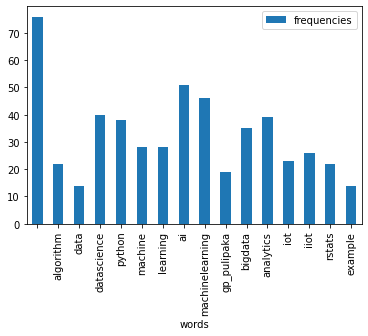

In [48]:
a.plot.bar(x = "words", y = "frequencies");

## Word cloud

In [49]:
!pip install wordcloud

In [50]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [51]:
text = " ".join(i for i in df.text)

In [52]:
text

' programmatoris protecting encryption algorithm attacker know key visit httpstcochxrvldpd solution enc data let look data opinion let go mine datascience qotd httpstcogwlapeqktk  strategy_gal wanna learn python datascience youre intimidated worried youll go back school promise  qutdatascience data science impoant check latest video explore question show ju  yuhelenyu popular machine learning algorithm nutshell httpstcopsdfiylw ai machinelearning dataanalytics datascie  yuhelenyu popular machine learning algorithm nutshell httpstcopsdfiylw ai machinelearning dataanalytics datascie  gp_pulipaka coding interview university bigdata analytics datascience ai machinelearning iot iiot pytorch python rstats te  gp_pulipaka coding interview university bigdata analytics datascience ai machinelearning iot iiot pytorch python rstats te  yuhelenyu popular machine learning algorithm nutshell httpstcopsdfiylw ai machinelearning dataanalytics datascie  viewlinktree aws networking masterclass amazon vp

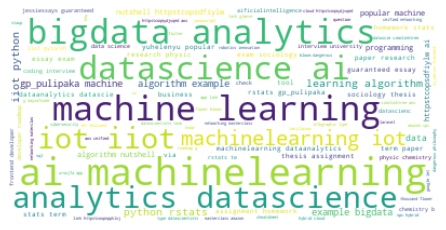

In [53]:
wordcloud = WordCloud(background_color = "white").generate(text)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [54]:
vbo_mask = np.array(Image.open("VBO.jpg"))

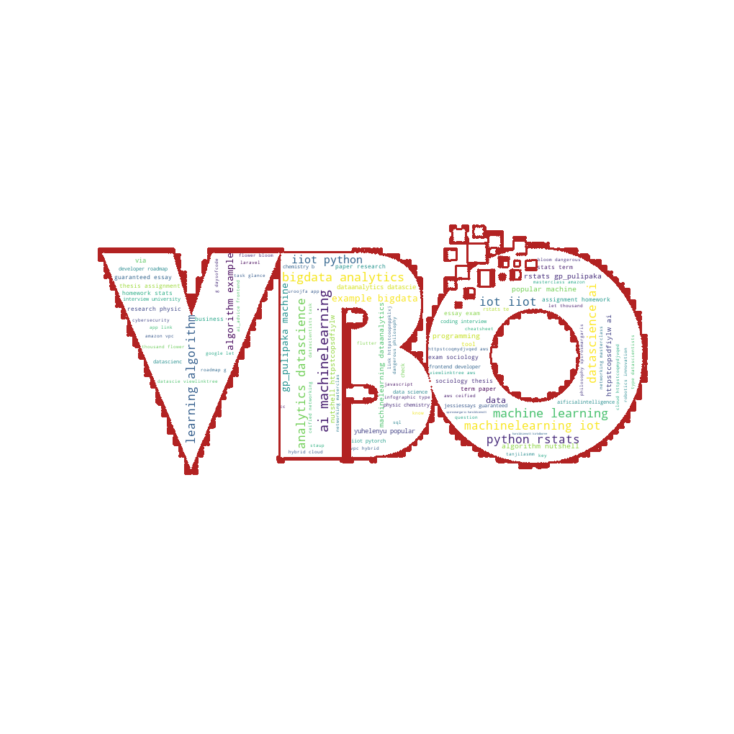

In [55]:
wc = WordCloud(background_color = "white", 
               max_words = 1000, 
               mask = vbo_mask,
              contour_width = 3, 
              contour_color = "firebrick")

wc.generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Twitter sentiment analysis

In [121]:
df["text"]

0      programmatoris protecting encryption algorith...
1     data let look data opinion let go mine datasci...
2      strategy_gal wanna learn python datascience y...
3      qutdatascience data science impoant check lat...
4      yuhelenyu popular machine learning algorithm ...
                            ...                        
81     ratingology 𝐒𝐭𝐚𝐭𝐬 𝐨𝐟 𝐥𝐢𝐯𝐞 𝐯𝐢𝐞𝐰𝐞𝐫𝐬 𝐨𝐧 youtube ...
82     bdanalyticsnews confused machine learning yes...
83     sachinp data science comprises combination ma...
84     thefarooqii sql command type machinelearning ...
85     theraosambhaji chewy hiring staff machine lea...
Name: text, Length: 86, dtype: object

In [124]:
df.dtypes

id                                    int64
text                                 object
created_at              datetime64[ns, UTC]
retweeted                              bool
retweet_count                         int64
source                               object
user_screen_name                     object
user_followers_count                  int64
user_location                        object
Hashtags                             object
dtype: object

In [56]:
from textblob import TextBlob

In [156]:
def sentiment_score(df):
    
    text = df["text"]

    for i in range(0,len(text)):
        textB = TextBlob(str(text[i]))
        sentiment_score = textB.sentiment.polarity
        df["sentiment_score"][i] = sentiment_score
        
        if sentiment_score <0.00:          
            df["emotion_class"][i] = "Negative"

        elif sentiment_score >0.00:
            df["emotion_class"][i] = "Pozitif"

        else:
            df["emotion_class"][i] = "Notr"
            
    return df.head()

In [159]:
sentiment_score(df)

,sentiment_score,id,text,created_at,retweeted,retweet_count,source,user_screen_name,user_followers_count,user_location,Hashtags,emotion_class
0,0.0,1579724795272343552,programmatoris protecting encryption algorith...,2022-10-11 06:45:15+00:00,False,1,AI Data Governance Framework,gdprAI,7820,"England, United Kingdom",[],Notr
1,0.0,1579724766482616320,data let look data opinion let go mine datasci...,2022-10-11 06:45:08+00:00,False,0,QOTD_17,qotd_17,26,"Berkley, Port 17","[{'text': 'DataScience', 'indices': [87, 99]},...",Notr
2,0.0,1579724717027897345,strategy_gal wanna learn python datascience y...,2022-10-11 06:44:57+00:00,False,4,Twitter for iPhone,ujwaltickoo,1300,Bangalore,"[{'text': 'Python', 'indices': [30, 37]}, {'te...",Notr
3,0.5,1579724616125526017,qutdatascience data science impoant check lat...,2022-10-11 06:44:33+00:00,False,7,Twitter for Android,dembeno,43,"Hollandia, West Papua",[],Pozitif
4,0.6,1579724576304816128,yuhelenyu popular machine learning algorithm ...,2022-10-11 06:44:23+00:00,False,6,RetweetCodersWomen,BotFemale,3675,,"[{'text': 'AI', 'indices': [94, 97]}, {'text':...",Pozitif


In [160]:
df.groupby("emotion_class").count()["id"]

emotion_class
Negative     4
Notr        66
Pozitif     16
Name: id, dtype: int64

In [161]:
emotion_freq = df.groupby("emotion_class").count()["id"]

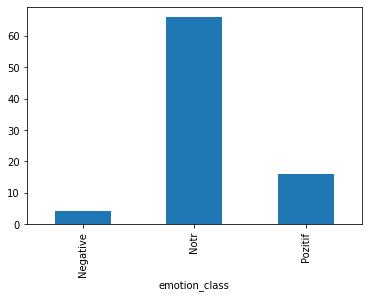

In [162]:
emotion_freq.plot.bar(x = "emotion_class", y = "id");

In [164]:
tweets = api.search_tweets(q = "#apple", lang = "en")

In [167]:
df = hashtag_df(tweets)

In [168]:
#buyuk-kucuk donusumu
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#noktalama işaretleri
df['text'] = df['text'].str.replace('[^\w\s]','')

#sayılar
df['text'] = df['text'].str.replace('\d','')

#stopwords
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

#lemmi
from textblob import Word
#nltk.download('wordnet')
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

#noktalama işaretleri
df['text'] = df['text'].str.replace('rt','')

In [172]:
df.head()

,id,text,created_at,retweeted,retweet_count,source,user_screen_name,user_followers_count,user_location,Hashtags
0,1579854105060970496,apple roll g suppo india via software update d...,2022-10-11 15:19:05+00:00,False,0,Twitter for iPhone,UnboxitCaptain,2,"New Delhi, India","[{'text': 'Apple', 'indices': [78, 84]}, {'tex..."
1,1579853978657226754,channel grpc v rest getting staed best api pr...,2022-10-11 15:18:35+00:00,False,1,education-bot,education_24x7,8938,Delhi,"[{'text': 'SEO', 'indices': [75, 79]}, {'text'..."
2,1579853955781492736,flash sale sale end pm ct save apple watch ser...,2022-10-11 15:18:29+00:00,False,0,Twitter Web App,pfdealz,141,India,[]
3,1579853930971877376,usahotdeal powera play amp charge kit xbox wi...,2022-10-11 15:18:24+00:00,False,1,retweet bot 1991,Legacycorp,2439,"Vancouver, BC",[]
4,1579853704387211264,powera play amp charge kit xbox wireless contr...,2022-10-11 15:17:30+00:00,False,1,Twitter Web App,USAhotdeal1,171,New York,[]


In [176]:
df["sentiment_score"] = 0
df["emotion_class"] = "alperen"
sentiment_score(df)

,id,text,created_at,retweeted,retweet_count,source,user_screen_name,user_followers_count,user_location,Hashtags,sentiment_score,emotion_class
0,1579854105060970496,apple roll g suppo india via software update d...,2022-10-11 15:19:05+00:00,False,0,Twitter for iPhone,UnboxitCaptain,2,"New Delhi, India","[{'text': 'Apple', 'indices': [78, 84]}, {'tex...",0.0,Notr
1,1579853978657226754,channel grpc v rest getting staed best api pr...,2022-10-11 15:18:35+00:00,False,1,education-bot,education_24x7,8938,Delhi,"[{'text': 'SEO', 'indices': [75, 79]}, {'text'...",1.0,Pozitif
2,1579853955781492736,flash sale sale end pm ct save apple watch ser...,2022-10-11 15:18:29+00:00,False,0,Twitter Web App,pfdealz,141,India,[],0.0,Notr
3,1579853930971877376,usahotdeal powera play amp charge kit xbox wi...,2022-10-11 15:18:24+00:00,False,1,retweet bot 1991,Legacycorp,2439,"Vancouver, BC",[],0.0,Notr
4,1579853704387211264,powera play amp charge kit xbox wireless contr...,2022-10-11 15:17:30+00:00,False,1,Twitter Web App,USAhotdeal1,171,New York,[],0.0,Notr


In [177]:
emotion_freq = df.groupby("emotion_class").count()["id"]

<AxesSubplot: xlabel='emotion_class'>

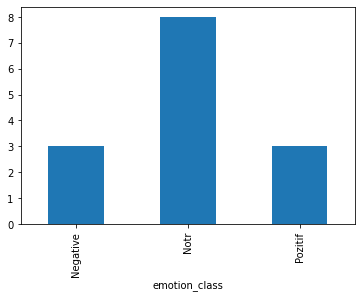

In [178]:
emotion_freq.plot.bar(x = "emotion_class", y = "id")